# Low Pass Filter Calculations
### Calculating the required components to build a low pass filter with a given cutoff frequency

### 1. Using Scipy

In [33]:
import pandas as pd
import numpy as np
import scipy
from scipy import signal
from matplotlib import pyplot as plt
from numpy.linalg import eig, inv
from numpy import diag

In [208]:
R = 200

L = 0.000006

C = 0.000000003

N = 200

In [209]:
alpha = 1/(2*R*C)
wo = 1/np.sqrt(L*C)

In [210]:
A = np.ndarray(shape=(2,2))
B = np.ndarray(shape=(2,1))

A = [[0, 1], [-wo*wo, -2*alpha]]
B = ([[0], [wo*wo]])

In [211]:
D, V = eig(A)
print(V)
print(D)

[[-1.5e-08-1.33322916e-07j -1.5e-08+1.33322916e-07j]
 [ 1.0e+00+0.00000000e+00j  1.0e+00-0.00000000e+00j]]
[-833333.33333333+7406828.68109632j -833333.33333333-7406828.68109632j]


In [212]:
I = 20*np.random.rand(N)-10;
dI = 300*np.random.rand(N)-150;
I

array([ 6.6862604 , -4.88188835,  2.52189881,  7.80330395,  9.29486642,
        8.32310569, -5.41540925,  0.64827928, -4.96971434,  6.91935084,
        4.11099957, -1.83024267, -5.10970907, -1.2184648 , -9.93744826,
        3.13754102,  2.10895415, -0.33856175, -9.67763391, -3.84568714,
       -3.54793988,  6.61597767,  2.14531802,  7.7210193 ,  6.61415981,
        9.56200054, -6.87736617,  6.62784058,  5.01750731, -5.47398379,
        3.56795273, -1.89842299,  6.7691075 , -5.44143722, -3.29930124,
       -1.44110996, -6.84490495,  6.8850295 , -5.67667629,  7.22182875,
        8.37425653,  6.97037925, -6.74697482, -5.4876996 ,  3.09237596,
       -2.75312311, -7.55665226,  4.95088014,  7.03627412,  9.15568339,
       -2.20768207,  8.38270904,  1.96230469, -6.43799564, -8.49914834,
        5.01361062,  4.46713452, -5.03594717,  4.42875542,  3.51763224,
       -2.91661424,  0.74124528, -8.6911425 ,  0.33673016,  5.3505808 ,
        1.93249778,  3.08457929, -1.14837962,  2.75176078,  2.40

In [213]:
hi = np.ndarray(shape=(2,1))
hi = [[I[1]], [dI[1]/L]]
ASv = inv(V)*hi
Xt = V*diag(ASv)
t = np.linspace(0,0.000008,wo/10)
U = L*(Xt[1][0]*np.exp(D[0]*t) +Xt[1][1]*np.exp(D[1]*t))

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """


Text(0, 0.5, 'Tension')

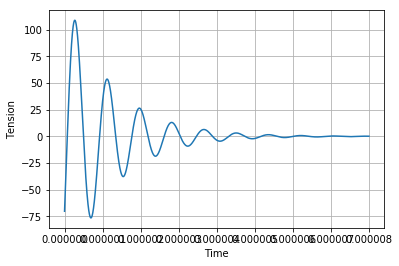

In [214]:
#print(U)
plt.plot(t, U)
plt.grid()
plt.xlabel('Time')
plt.ylabel('Tension')


In [221]:
hi = [[I[1]], [dI[1]/L]]
AS = inv(V)*hi

Xt = V*diag(AS)

#Plotting
t = np.linspace(0,0.0000006,wo/1000);
X1 = Xt[0][0]*np.exp(D[0]*t) +Xt[0][1]*np.exp(D[1]*t);
X2 = Xt[1][1]*np.exp(D[0]*t) +Xt[1][1]*np.exp(D[1]*t);  
fig = plt.figure(16, 9, 1)

for k in range(N):
    hi = [[I[k]], [dI[k]/L]]
    AS = inv(V)*hi

    Xt = V*diag(AS)

      #Plotting
    t = np.linspace(0,0.0000006,int(wo/1000));
    X1 = Xt[0][0]*np.exp(D[0]*t) +Xt[0][1]*np.exp(D[1]*t);
    X2 = Xt[1][1]*np.exp(D[0]*t) +Xt[1][1]*np.exp(D[1]*t);  
    plt.plot(X1[0], X2[0], 'o-')
    plt.plot(X1, X2)
    #plt.plot(X1[int(wo/1000)-1], X2[int(wo/1000)-1], 'o-')
    plt.xlabel('X1 - i(t)')
    plt.ylabel("X2 - di(t)/dt")
plt.grid()

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  import sys


TypeError: from_bounds() argument after * must be an iterable, not int

In [220]:
fig.savefig("figure", facecolor='w', edgecolor='w',
        orientation='portrait', format='pdf',
        transparent=False)